In [ ]:
#DataFrame exploration
import numpy as np
import pandas as pd
import re

shark_attack_df=pd.read_excel('https://www.sharkattackfile.net/spreadsheets/GSAF5.xls')

print(shark_attack_df.head())
print(shark_attack_df.shape)
print(shark_attack_df.columns)
print(shark_attack_df.dtypes)
print(shark_attack_df.nunique())


#Filtering dataframe to only keep attacks in the USA:
shark_attacks_USA_df=shark_attack_df[shark_attack_df['Country']=='USA'] #(2538, 23)

#Filtering columns: columns_to_keep=['Date','Year','State','Location','Activity','Sex', 'Age', 'Injury','Species']
shark_attacks_USA_df=shark_attacks_USA_df[['Date','Year','State','Location','Activity','Sex', 'Age', 'Injury','Species ']] # (2538, 9)

#Removing completely empty rows
shark_attacks_USA_df=shark_attacks_USA_df.dropna(how='all') # (2538, 9)

#Stripping columns names
shark_attacks_USA_df.columns=[x.strip() for x in shark_attacks_USA_df.columns]

shark_attacks_USA_df.head()


#> Analytics
#    > Per variable (count, mean, frequency) (.describe)
#    > Grouping/filtering
#      > count/rate? of accident type (no injury, injury, fatal) per location
#      > count/rate? of accident type per location and per season
#      > percentage of shark species type per location and in the count of fatal injuries
#      > count of accident per location per sex and age
#      > count of accident type per location per activity

#staffing agency
#      > Accidents type (how bad)
#      > Location/state/country (ex: more staff on these locations)
#      > Date/Seasons (ex: more staff on these dates)
#      > Shark Species (ex: train staff to recognise their behavior to prevent attacks)
#      > Sex+Age (ex: set in place prevention on locations and toward specific gender age)
#      > Activity (ex: categorize location and train staff accordingly)

#State cleaning

#Stripping values to remove whitespaces
shark_attacks_USA_df["State"]=shark_attacks_USA_df["State"].str.strip()
shark_attacks_USA_df['State'].value_counts()

#Filtering the DataFrame to keep only states with more than 2 occurrences
state_counts = shark_attacks_USA_df['State'].value_counts()
shark_attacks_USA_df= shark_attacks_USA_df[shark_attacks_USA_df['State'].isin(state_counts[state_counts > 2].index)]
shark_attacks_USA_df['State'].value_counts()
shark_attacks_USA_df.shape # (2501, 9)

#Location cleaning

#Stripping values to remove whitespaces (removed about 20 values)
shark_attacks_USA_df["Location"]=shark_attacks_USA_df["Location"].str.strip()
shark_attacks_USA_df['Location'].value_counts()

#Activity cleaning

#Stripping values to remove whitespaces (removed about 15 categories)
shark_attacks_USA_df["Activity"]=shark_attacks_USA_df["Activity"].str.strip()
shark_attacks_USA_df['Activity'].value_counts()

#Replacing entries containing specific words with appropriate related value (gained about 100 values for surfing)
#We will not remove values with low occurences here as these records are still relevant for global count of attacks.
shark_attacks_USA_df["Activity"] =shark_attacks_USA_df["Activity"].str.lower()
shark_attacks_USA_df.loc[shark_attacks_USA_df['Activity'].str.contains('surfing', case=False, na=False), 'Activity'] = 'surfing'
shark_attacks_USA_df.loc[shark_attacks_USA_df['Activity'].str.contains('swimming', case=False, na=False), 'Activity'] = 'swimming'
shark_attacks_USA_df.loc[shark_attacks_USA_df['Activity'].str.contains('fishing', case=False, na=False), 'Activity'] = 'fishing'
shark_attacks_USA_df.loc[shark_attacks_USA_df['Activity'].str.contains('wading', case=False, na=False), 'Activity'] = 'wading'
shark_attacks_USA_df.loc[shark_attacks_USA_df['Activity'].str.contains('standing', case=False, na=False), 'Activity'] = 'standing'
shark_attacks_USA_df['Activity'].value_counts()

#Species cleaning
#Stripping values to remove whitespaces (removed about 30 categories)
shark_attacks_USA_df["Species"]=shark_attacks_USA_df["Species"].str.strip()
#Replacing entries containing specific words with appropriate related value
shark_attacks_USA_df.loc[shark_attacks_USA_df['Species'].str.contains('not confirmed', case=False, na=False), 'Species'] = 'unconfirmed'
shark_attacks_USA_df.loc[shark_attacks_USA_df['Species'].str.contains('unconfirmed', case=False, na=False), 'Species'] = 'unconfirmed'
shark_attacks_USA_df.loc[shark_attacks_USA_df['Species'].str.contains('invalid', case=False, na=False), 'Species'] = 'unconfirmed'
#keeping the larger shark size - focused on shark size, could have focused on species name
shark_attacks_USA_df.loc[shark_attacks_USA_df['Species'].str.contains("8'", case=False, na=False), 'Species'] = "8' shark"
shark_attacks_USA_df.loc[shark_attacks_USA_df['Species'].str.contains("7'", case=False, na=False), 'Species'] = "7' shark"
shark_attacks_USA_df.loc[shark_attacks_USA_df['Species'].str.contains("6'", case=False, na=False), 'Species'] = "6' shark"
shark_attacks_USA_df.loc[shark_attacks_USA_df['Species'].str.contains("5'", case=False, na=False), 'Species'] = "5' shark"
shark_attacks_USA_df.loc[shark_attacks_USA_df['Species'].str.contains("4'", case=False, na=False), 'Species'] = "4' shark"
shark_attacks_USA_df.loc[shark_attacks_USA_df['Species'].str.contains("3'", case=False, na=False), 'Species'] = "3' shark"

shark_attacks_USA_df['Species'].value_counts()




          Date    Year        Type    Country              State  \
0  15 Mar 2024  2024.0  Unprovoked  AUSTRALIA         Queensland   
1  04 Mar 2024  2024.0  Unprovoked        USA             Hawaii   
2  02 Mar-2024  2024.0  Unprovoked        USA             Hawaii   
3  25 Feb-2024  2024.0  Unprovoked  AUSTRALIA  Western Australia   
4  14 Feb-2024  2024.0  Unprovoked      INDIA        Maharashtra   

                           Location  Activity                 Name Sex  Age  \
0                     Bargara Beach  Swimming       Brooklyn Sauer   F   13   
1                Old Man's, Waikiki   Surfing        Matthew White   M  NaN   
2                    Rainbows, Oahu  Swimming                  NaN   F   11   
3        Sandlnd Island, Jurian Bay       NaN               female   F   46   
4  Vaitarna River, Palghar District   Fishing  Vicky Suresh Govari   M   32   

   ...        Species                      Source  pdf href formula href  \
0  ...     Tiger shark      Yahoo News, 

,count
Species,
5' shark,219
unconfirmed,156
4' shark,142
8' shark,127
6' shark,118
...,...
"Tiger shark, less than 10'",1
juvenile white shark,1
Possibly a sandbar shark or small blacktip shark,1


In [ ]:
#Season column creation
def get_season(date_str):
    if any(month in date_str for month in ["Mar", "Apr", "May"]):
        return 'spring'
    elif any(month in date_str for month in ["Jun", "Jul", "Aug"]):
        return 'summer'
    elif any(month in date_str for month in ["Sep", "Oct", "Nov"]):
        return 'autumn'
    elif any(month in date_str for month in ["Dec", "Jan", "Feb"]):
        return 'winter'
    return 'unknown'

##Apply the function to the 'New_Date2' column and create a new column 'Season'
shark_attacks_USA_df['Season'] = shark_attacks_USA_df['New_Date2'].apply(get_season)


In [ ]:
#Dates cleaning
#shark_attacks_USA_df2=shark_attacks_USA_df.copy()
shark_attacks_USA_df['New_Date'] = shark_attacks_USA_df['Date'].str.replace('-', ' ')

def remove_until_number(s):
    return re.sub(r'^[^\d]*', '', s)

# Ensure all column values are strings and handle NaN
shark_attacks_USA_df['New_Date'] = shark_attacks_USA_df['New_Date'].astype(str).fillna('')

# Apply the function to the column and create a new column
shark_attacks_USA_df['New_Date2'] = shark_attacks_USA_df['New_Date'].apply(remove_until_number)

In [ ]:
#Year with raws for seasons column creation
def extract_last_four_digits(date_str):
    # Ensure the value is a string
    date_str = str(date_str)
    # Check if the last four characters are digits
    if len(date_str) >= 4 and date_str[-4:].isdigit():
        return date_str[-4:]
    else:
        return ''
shark_attacks_USA_df['Last_Four_Digits'] = shark_attacks_USA_df['New_Date2'].apply(extract_last_four_digits)
shark_attacks_USA_df.rename(columns={'Last_Four_Digits': 'Year_with_Season'}, inplace=True)

In [ ]:

shark_attacks_USA_df.head(50)


,Date,Year,State,Location,Activity,Sex,Age,Injury,Species,New_Date,New_Date2,Season,Year_with_Season
1,04 Mar 2024,2024.0,Hawaii,"Old Man's, Waikiki",surfing,M,NaN,"No injury, shark bit surfboard",8' shark,04 Mar 2024,04 Mar 2024,spring,2024
2,02 Mar-2024,2024.0,Hawaii,"Rainbows, Oahu",swimming,F,11,Lacerations to left foot,4' shark,02 Mar 2024,02 Mar 2024,spring,2024
10,30 Dec-2023,2023.0,Hawaii,"Baby Beach, Maui",surfing,M,39,FATAL,NaN,30 Dec 2023,30 Dec 2023,winter,2023
24,05 Nov-2023,2023.0,Florida,"Juno Beach, Palm Beach County",swimming,M,66,Lacerations to right forearm,NaN,05 Nov 2023,05 Nov 2023,autumn,2023
29,25 Oct 2023,2023.0,Hawaii,"Pua’ena Point, Haleiwa, Oahu",surfing,M,30,Bite to right thigh,8' shark,25 Oct 2023,25 Oct 2023,autumn,2023
33,15 Oct 2023,2023.0,Hawaii,"Hanalei Bay, Kauai",surfing,M,50,Left leg and hand injured,10' tiger shark,15 Oct 2023,15 Oct 2023,autumn,2023
34,13 Oct-2023,2023.0,California,"Linda Mar, Pacific State Beach, San Mateo County",surfing,M,52,Minor linjury to left lower leg,NaN,13 Oct 2023,13 Oct 2023,autumn,2023
35,02 Oct-2023,2023.0,Hawaii,"Paia, Maui",surfing,F,45,Minor injury. Shark bit surfboard,10' to 12' Galapagos shark,02 Oct 2023,02 Oct 2023,autumn,2023
37,01 Oct-2023,2023.0,California,"Wildcat Beach, Marin County",swimming,M,52,Body not recovered,NaN,01 Oct 2023,01 Oct 2023,autumn,2023
38,18 Sep-2023,2023.0,South Carolina,"Myrtle Beach, Horry County",swimming,M,NaN,Non-lifethreatening injuries,NaN,18 Sep 2023,18 Sep 2023,autumn,2023


In [ ]:
#Sex cleaning

import re

def correct_sex(value):

    value = str(value).strip()


    if re.match(r'^M(\s*x\s*\d*)?$', value, re.IGNORECASE):  # 'M', 'M ', 'M x 2'
        return 'M'
    elif re.match(r'^F$', value, re.IGNORECASE):  # 'F'
        return 'F'
    elif re.match(r'^N$', value, re.IGNORECASE):  # 'N'
        return 'Unknown'
    else:
        return 'Unknown'

shark_attacks_USA_df.loc[:, 'Sex'] = shark_attacks_USA_df['Sex'].apply(correct_sex)
print(shark_attacks_USA_df['Sex'].unique())

['M' 'F' 'Unknown']


In [ ]:
#Injury cleaning

import re

def categorize_injury(injury):
    injury = str(injury).strip().lower()


    if re.search(r'fatal|died|death|bit him in half|knocked over', injury):
        return 'Fatal'


    elif re.search(r'minor|small|superficial|laceration|bite|abrasion', injury):
        return 'Minor'


    elif re.search(r'no injury|uninjured|not injured', injury):
        return 'No Injury'


    else:
        return 'Unknown'


shark_attacks_USA_df.loc[:, 'Injury']  = shark_attacks_USA_df['Injury'].apply(categorize_injury)
print(shark_attacks_USA_df.Injury.unique())

['No Injury' 'Minor' 'Fatal' 'Unknown']


In [ ]:
#Age Cleaning

import numpy as np
import re

def clean_age(value):

    if pd.isna(value):
        return np.nan
    match = re.search(r'^\d+', str(value))
    if match:
        return int(match.group())
    else:
        return np.nan

shark_attacks_USA_df.loc[:,'Age'] = shark_attacks_USA_df['Age'].apply(clean_age)

shark_attacks_USA_df.loc[:,'Age'] = shark_attacks_USA_df['Age'].fillna(shark_attacks_USA_df['Age'].median())

print(shark_attacks_USA_df['Age'].unique())

[23.0 11.0 39.0 66.0 30.0 50.0 52.0 45.0 38.0 37.0 9.0 19.0 65.0 22.0 26.0
 60.0 49.0 21.0 47.0 15.0 35.0 20.0 24.0 13.0 58.0 67.0 34.0 68.0 10.0
 29.0 40.0 51.0 31.0 33.0 16.0 41.0 17.0 28.0 62.0 56.0 12.0 42.0 18.0
 27.0 25.0 64.0 36.0 8.0 7.0 14.0 71.0 54.0 57.0 73.0 61.0 48.0 70.0 55.0
 32.0 74.0 46.0 3.0 69.0 43.0 59.0 6.0 44.0 63.0 53.0 5.0 86.0 87.0 77.0
 75.0 4.0]


In [ ]:
shark_attacks_USA_df.head()

,Date,Year,State,Location,Activity,Sex,Age,Injury,Species,New_Date,New_Date2,Season,Year_with_Season
1,04 Mar 2024,2024.0,Hawaii,"Old Man's, Waikiki",surfing,M,23.0,No Injury,8' shark,04 Mar 2024,04 Mar 2024,spring,2024
2,02 Mar-2024,2024.0,Hawaii,"Rainbows, Oahu",swimming,F,11.0,Minor,4' shark,02 Mar 2024,02 Mar 2024,spring,2024
10,30 Dec-2023,2023.0,Hawaii,"Baby Beach, Maui",surfing,M,39.0,Fatal,NaN,30 Dec 2023,30 Dec 2023,winter,2023
24,05 Nov-2023,2023.0,Florida,"Juno Beach, Palm Beach County",swimming,M,66.0,Minor,NaN,05 Nov 2023,05 Nov 2023,autumn,2023
29,25 Oct 2023,2023.0,Hawaii,"Pua’ena Point, Haleiwa, Oahu",surfing,M,30.0,Minor,8' shark,25 Oct 2023,25 Oct 2023,autumn,2023


In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

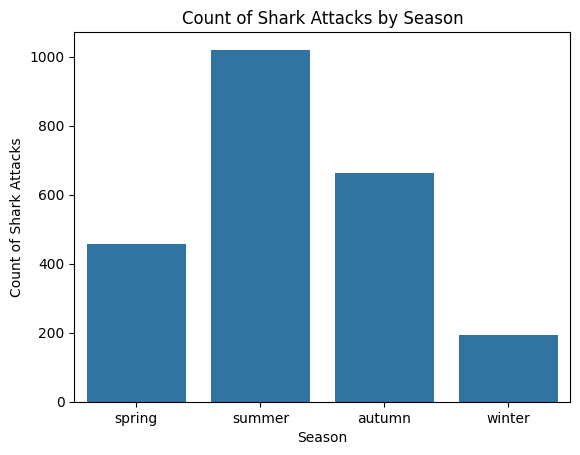

In [ ]:
sns.countplot(x='Season', data=shark_attacks_USA_df, order=['spring', 'summer', 'autumn', 'winter'])

# Adding titles and labels
plt.title('Count of Shark Attacks by Season')
plt.xlabel('Season')
plt.ylabel('Count of Shark Attacks')

# Display chart
plt.show()

In [ ]:
state_counts = shark_attacks_USA_df['State'].value_counts()

In [ ]:
# Filter on states with at least 10 occurences
states_to_keep = ['Florida', 'Hawaii', 'South Carolina', 'Texas', 'New Jersey', 'North Carolina']
filtered_df = shark_attacks_USA_df[shark_attacks_USA_df['State'].isin(states_to_keep)]

Text(0, 0.5, 'Count of Shark Attacks')

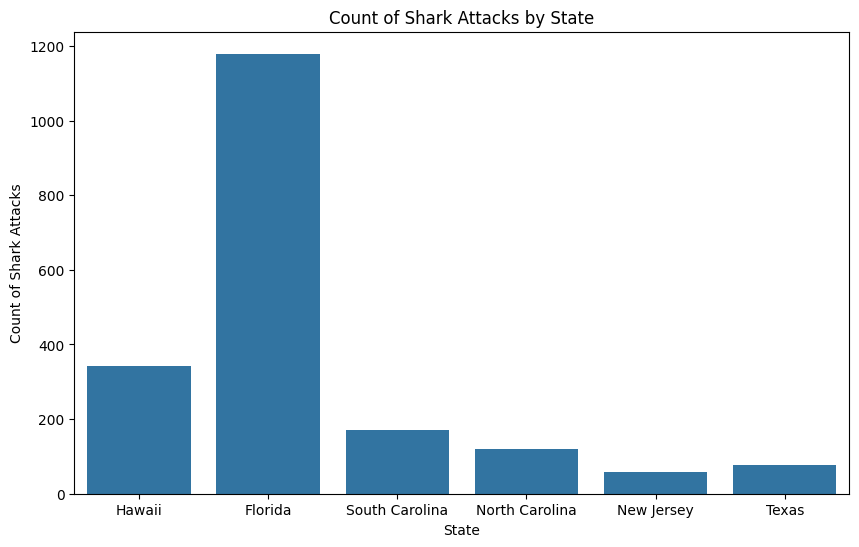

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='State', data=filtered_df)
plt.title('Count of Shark Attacks by State')
plt.xlabel('State')
plt.ylabel('Count of Shark Attacks')


Text(0, 0.5, 'Count of Shark Attacks')

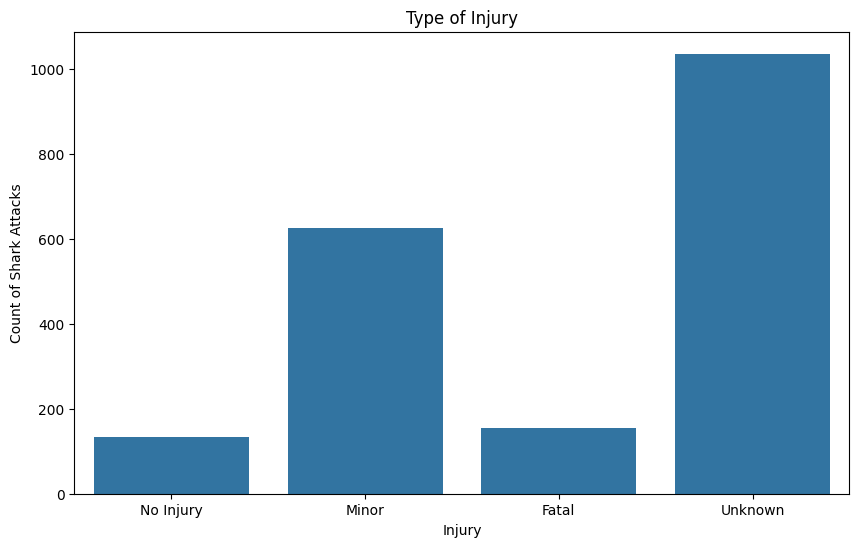

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Injury', data=filtered_df)
plt.title('Type of Injury')
plt.xlabel('Injury')
plt.ylabel('Count of Shark Attacks')

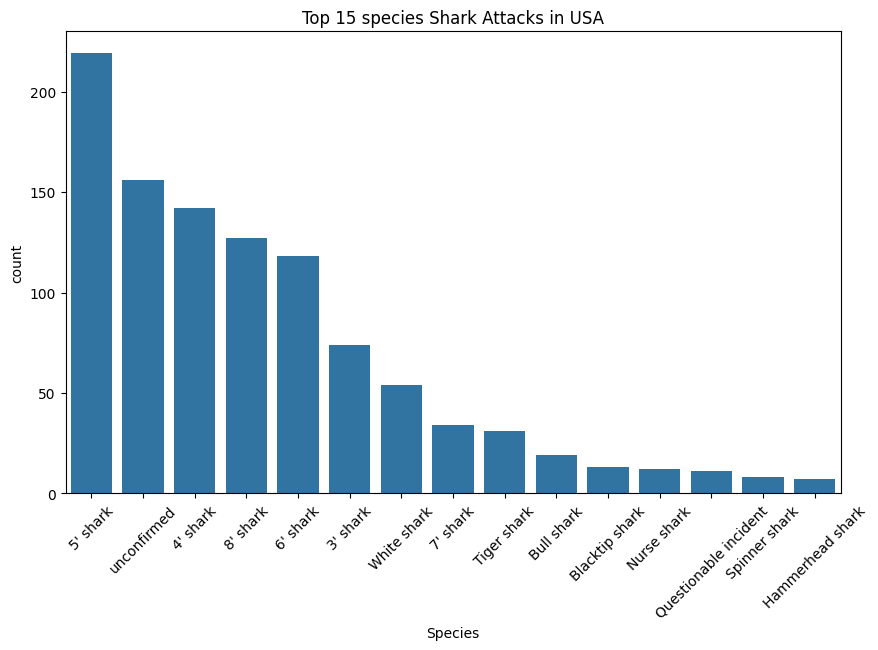

In [ ]:

top_species = shark_attacks_USA_df['Species'].value_counts().nlargest(15).index
top_species_df = shark_attacks_USA_df[shark_attacks_USA_df['Species'].isin(top_species)]

# Create the countplot for top 15 states
plt.figure(figsize=(10, 6))
sns.countplot(x='Species', data=top_species_df, order=top_species)
plt.xticks(rotation=45)  # Rotate the x labels if needed
plt.title('Top 15 species Shark Attacks in USA')
plt.show()


In [ ]:
shark_attacks_USA_df.groupby(['State', 'Injury'])[['Injury']].count()

shark_attacks_USA_df[shark_attacks_USA_df['State']=='Florida']['Injury'].value_counts()

,count
Injury,
Unknown,633
Minor,435
Fatal,60
No Injury,51


In [ ]:
filtered_df =shark_attacks_USA_df[shark_attacks_USA_df['Injury']== 'Fatal']

In [ ]:
print(filtered_df.groupby(['State', 'Season'])[['Season']].count())
print(filtered_df.groupby('State')[['State']].count())


                           Season
State             Season         
Alabama           autumn        1
                  summer        2
California        autumn        3
                  spring        6
                  summer       10
                  unknown       1
                  winter        6
Florida           autumn       20
                  spring        6
                  summer       24
                  unknown       7
                  winter        3
Georgia           summer        3
Hawaii            autumn        6
                  spring       10
                  summer       10
                  unknown      12
                  winter       13
Louisiana         autumn        2
Maryland          summer        2
Massachusetts     autumn        1
                  spring        1
                  summer        3
Mississippi       summer        1
                  unknown       1
New Jersey        summer        6
New York          autumn        1
              

Text(0, 0.5, 'Count of Shark Attacks')

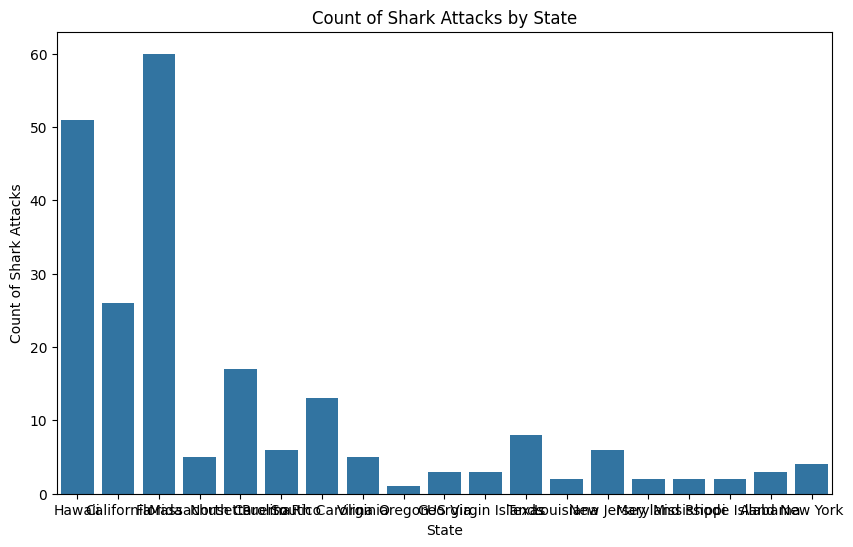

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='State', data=filtered_df)
plt.title('Count of Shark Attacks by State')
plt.xlabel('State')
plt.ylabel('Count of Shark Attacks')

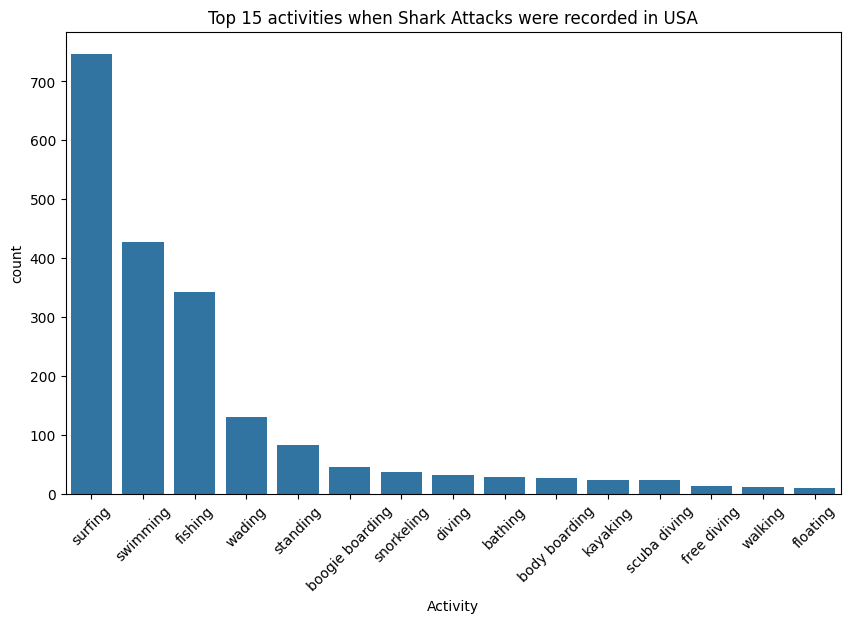

In [ ]:
top_activity = shark_attacks_USA_df['Activity'].value_counts().nlargest(15).index
top_activity_df = shark_attacks_USA_df[shark_attacks_USA_df['Activity'].isin(top_activity)]

# Create the countplot for top 15 states
plt.figure(figsize=(10, 6))
sns.countplot(x='Activity', data=top_activity_df, order=top_activity)
plt.xticks(rotation=45)  # Rotate the x labels if needed
plt.title('Top 15 activities when Shark Attacks were recorded in USA')
plt.show()

In [ ]:
top_activity_4 = shark_attacks_USA_df['Activity'].value_counts().nlargest(4).index
top_activity_4_df = shark_attacks_USA_df[shark_attacks_USA_df['Activity'].isin(top_activity_4)]

top_activity_4_df.groupby(['Activity','Injury'])[['Activity']].count()

Activity
Activity Injury             
fishing  Fatal            28
         Minor            72
         No Injury        68
         Unknown         174
surfing  Fatal            15
         Minor           252
         No Injury        90
         Unknown         390
swimming Fatal            69
         Minor           131
         No Injury         8
         Unknown         220
wading   Fatal             3
         Minor            57
         No Injury         3
         Unknown          67

from matplotlib import pyplot as plt
_df_0['Activity'].plot(kind='hist', bins=20, title='Activity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Activity'].plot(kind='line', figsize=(8, 4), title='Activity')
plt.gca().spines[['top', 'right']].set_visible(False)

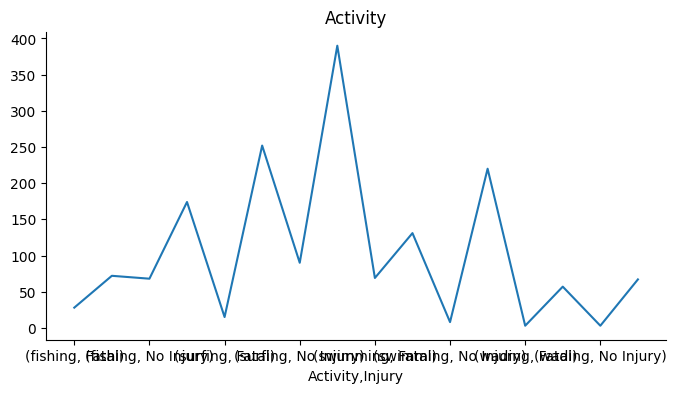

In [ ]:
from matplotlib import pyplot as plt
_df_1['Activity'].plot(kind='line', figsize=(8, 4), title='Activity')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
shark_attacks_USA_df.head()
shark_attacks_USA_df.reset_index(drop=True)

,Date,Year,State,Location,Activity,Sex,Age,Injury,Species,New_Date,New_Date2,Season,Year_with_Season
0,04 Mar 2024,2024.0,Hawaii,"Old Man's, Waikiki",surfing,M,23.0,No Injury,8' shark,04 Mar 2024,04 Mar 2024,spring,2024
1,02 Mar-2024,2024.0,Hawaii,"Rainbows, Oahu",swimming,F,11.0,Minor,4' shark,02 Mar 2024,02 Mar 2024,spring,2024
2,30 Dec-2023,2023.0,Hawaii,"Baby Beach, Maui",surfing,M,39.0,Fatal,NaN,30 Dec 2023,30 Dec 2023,winter,2023
3,05 Nov-2023,2023.0,Florida,"Juno Beach, Palm Beach County",swimming,M,66.0,Minor,NaN,05 Nov 2023,05 Nov 2023,autumn,2023
4,25 Oct 2023,2023.0,Hawaii,"Pua’ena Point, Haleiwa, Oahu",surfing,M,30.0,Minor,8' shark,25 Oct 2023,25 Oct 2023,autumn,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,Before 1958,0.0,Florida,"Palm Beach, Palm Beach County",standing,M,23.0,Minor,NaN,Before 1958,1958,unknown,1958
2497,Before 1921,0.0,Florida,"Gadsden Point, Tampa Bay",fishing,M,23.0,Minor,NaN,Before 1921,1921,unknown,1921
2498,Before 17-Jul-1916,0.0,North Carolina,Somewhere between Hatteras and Beaufort,swimming,M,23.0,Unknown,NaN,Before 17 Jul 1916,17 Jul 1916,summer,1916
2499,Circa 1862,0.0,Hawaii,Puna,NaN,F,23.0,Unknown,NaN,Circa 1862,1862,unknown,1862
